In [1]:
# Preparation du jeu de donnees
from sklearn.datasets import load_iris

# Chargement des donnees dans des variables x et y
iris = load_iris()
x, y = iris.data, iris.target

In [2]:
# Import de  l'algo de ML, ou Estimator
from sklearn.neighbors import KNeighborsClassifier

# Instanciation de notre modele
k5 = KNeighborsClassifier(n_neighbors=5)

# On fait travailler l'algo de maniere supervisee (on connait les resultats attendus, ils sont dans y) 
k5.fit(x, y)

# On peut maintenant "predire" les resultats a partir de donnees inconnues
x_new = [[1,2,3,4], [5,4,3,2]]
k5.predict(x_new)


array([1, 1])

In [3]:
# On peut egalement utiliser un autre algo
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x, y)
logreg.predict(x_new)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([2, 0])

In [4]:
# Pour le lol, un petit affichage qui va bien, en utilisant les vrais noms des plantes
#[(x_new[i[0]], iris.target_names[i[1]]) for i in enumerate(linleg.predict(x_new).tolist())]
[(iris.target_names[i[0]], i[1]) for i in enumerate(logreg.predict(x_new))]

[('setosa', 2), ('versicolor', 0)]

In [5]:
# On passe maintenant aux tests de nos petits modeles

# Premiere facon : on entraine le modele sur les donnees de base
# et on compare les predictions avec les resultats connus

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 

# Instanciation, entrainement et prediction d'un modele KNN
# Au fait, c'est quoi et ca vaut quoi x et Y ?
k5 = KNeighborsClassifier(n_neighbors=5)
k5.fit(x, y)
k5_pred = k5.predict(x)

# Pareil pour un model sur 5 voisins
k1 = KNeighborsClassifier(n_neighbors=1)
k1.fit(x, y)
k1_pred = k1.predict(x)

# Une autre type de modele
lg = LogisticRegression()
lg.fit(x, y)
lg_pred = lg.predict(x)

# Affichage en transformant l'int de accuracy_score(), on peut faire plus beau !
# C'est une metrique d'evaluation, ici un pourcentage de precision
print('Training accuracy of KNN5 ' + str(metrics.accuracy_score(y, k5_pred)))
print('Training accuracy of LogReg ' + str(metrics.accuracy_score(y, lg_pred)))

# Logique que le KNN1 soit a 100%, c'est du au fonctionnement de l'algo
# Pour chaque observation, il va cherche la 1 plus proche, et va choper la meme donnee qu'a la base
print('Training accuracy of KNN1 ' + str(metrics.accuracy_score(y, k1_pred)))


Training accuracy of KNN5 0.9666666666666667
Training accuracy of LogReg 0.96
Training accuracy of KNN1 1.0


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [6]:
# Deuxieme façon de tester les modèles : par séparation
# On sépare les modèles en set d'entrainement et set de test
# On entraine via le set d'entrainement
# On test la prédiciton sur le set de test
# On évalue la precision du modele

from sklearn.model_selection import train_test_split

# La bonne fonction de la lib, qui nous prépare un train set et test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

print('Forme de x_train ' + str(x_train.shape) + ' observations')
print('Forme de x_test ' + str(x_test.shape) + ' observations')

print('Forme de y_train ' + str(y_train.shape) + ' observations')
print('Forme de y_test ' + str(y_test.shape) + ' observations')

# Maintenant que les sets sont prets
# on entraine le modele sur le set d'entrainement
lr = LogisticRegression()
lr.fit(x_train, y_train)

# On fait les predictions avec les observation de test
lr_pred = lr.predict(x_test)

# On compare les predictions de test avec les resultats attendus de test
print("Precision des modeles en utilisant la méthode de séparation des jeux d'entrainement et de test: ")
print('Regression Logistique : ' + str(metrics.accuracy_score(y_test, lr_pred)))

# Un autre exemple sur un autre type de modèle
k1 = KNeighborsClassifier(n_neighbors=1)
k1.fit(x_train, y_train)
k1_pred = k1.predict(x_test)
print('KNN avec K = 1 : ' + str(metrics.accuracy_score(y_test, k1_pred)))

# Un dernier exemple, un dernier modele
k5 = KNeighborsClassifier(n_neighbors=5)
k5.fit(x_train, y_train)
k5_pred = k5.predict(x_test)
print('KNN avec K = 5 : ' + str(metrics.accuracy_score(y_test, k5_pred)))

# On voit qu'ici, KNN1 ne semble plus aussi interessant, plus a 100%
# knN avec K = 5 semble bien plus precis

Forme de x_train (90, 4) observations
Forme de x_test (60, 4) observations
Forme de y_train (90,) observations
Forme de y_test (60,) observations
Precision des modeles en utilisant la méthode de séparation des jeux d'entrainement et de test: 
Regression Logistique : 0.9333333333333333
KNN avec K = 1 : 0.95
KNN avec K = 5 : 0.9666666666666667


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0, 0.5, 'Precision de test')

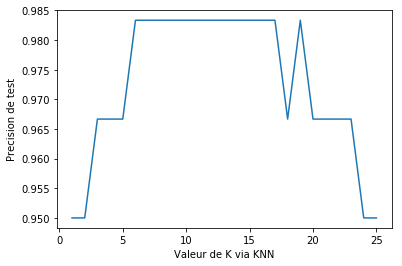

In [7]:
# For the lol



# On sauvegarde les precision de chaque model entre knn avec k=1 jusqu'a k = 25
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


# Importation de Matplotlib, lib scientifique
import matplotlib.pyplot as plt

# Permet a plot de s'afficher au sein du noebook jupyter
%matplotlib inline

# Affiche les relations entre les valeurs de K et la precision de test
plt.plot(k_range, scores)
plt.xlabel('Valeur de K via KNN')
plt.ylabel('Precision de test')

# On se rend compte que les modeles les moins et les plus complexes
# On peut maintenant s'amuser a faire des prediction en utilisant les valeurs de K les plus precises !


In [8]:
# Le probleme, c'est que si je veux entrainer mon modele pour le rendre plus performant,
# je vais l éntrainer sur ce set de test la ... et comment je le valide du coup ?

# Et bien il me faut garder a la base un troisieme split du DS de base, qui servira a la validation

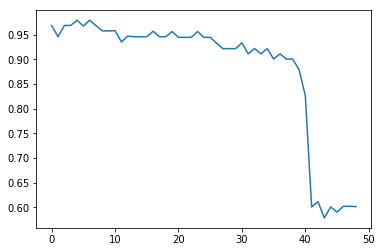

In [9]:
# Pour faire de la corss validaton :
from sklearn.model_selection import cross_val_score

# ici, on va entrainer le modele sur plusieurs decoupage de data set differents
# ca permet de ne pas tomber dans le piege de boser sur un type de decoupage qui induierait une
# particularite artificielle dans le modele
cross_val_score(KNeighborsClassifier(1), x_train, y_train, cv=5, scoring = 'accuracy')

# Aller, on se motive pour tester en boucle notre modele
val_score = []
for i in range(1, 50):
    # On test KNN de 1 à 50, a chaque fois sur des decoupage de dataset differents, en prenant leur moyenne
    # Sexy hein ?
    score = cross_val_score(KNeighborsClassifier(i), x_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

(49, 5)
(49, 5)


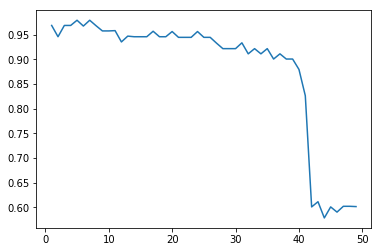

In [10]:
# Mais ... pourquoi on se fait chier ? Regarde :
from sklearn.model_selection import validation_curve
import numpy as np
# Nianiania, instanciation d'un modele 
# et creation d'un numpy array avec une liste de 0 a 50
model = KNeighborsClassifier()
k = np.arange(1, 50)

# On balance :
# - le modele qu'on veut tester
# - les data et targets
# - l'hyper parametre qu'on veut tester avec les valeur à balancer
# - le nombre de decoupe dans la cross validation

train_score, val_score = validation_curve(model, x_train, y_train, 'n_neighbors', k, cv=5)

# On recupere :
print(train_score.shape)
# train_score : les scores sur les set d'entrainement
# train_score : avec 49 resultats (nos valeur d'hyperparam) * 5 (la cross validation) 

print(val_score.shape)
# val_score : les scores sur les set de test, avec la meme forme pour les memes raisons

# On récupère la moyenne de nos resultats de test
mean = val_score.mean(axis=1)

# Et on l'affiche !
plt.plot(k, mean)

# Et la on a testé : avec differents decoupages, sur differentes valeurs de K

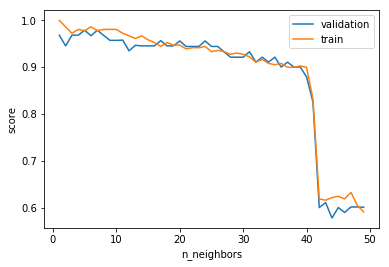

In [11]:

# Vu qu'on est forts pour le copié collé, on peut même enrichir le graphique avec les
# résultats sur les donnees d'entrainement
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [12]:
# Bon, on a teste sur l'hyper parametre n_neighbors ...
# Mais y'en a plein d'autres a tester si on veut bien regler notre modele
# Heureusement il y a findus

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}
# On peut choper les valeurs des parameters possible de l'algo
# print(KNeighborsClassifier().get_params().keys())

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

# On affiche quelques petites infos cools
print('Meilleur score de la grille : ' + str(grid.best_score_))
print('Parametres utilises pur ce meilleur score : ' + str(grid.best_params_))

# On peut meme recuperer l' estimator puis le tester
model = grid.best_estimator_
model.score(x_test, y_test)

Meilleur score de la grille : 0.9777777777777777
Parametres utilises pur ce meilleur score : {'n_neighbors': 5, 'metric': 'euclidean'}


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9666666666666667

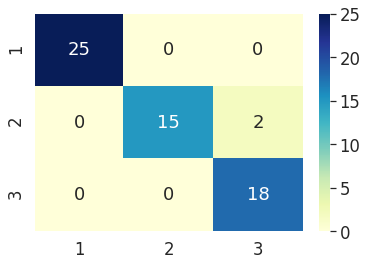

In [13]:
# Aller toujours plus de fun
from sklearn.metrics import confusion_matrix

# On check la repartition de nos donnees en lui passant les resultats
# de test CONNUS, et l' output du model sur ces donnees
matrix = confusion_matrix(y_test, model.predict(x_test))

'''
array([[25,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 18]])
       
En Y la vraie valeur (0, 1 et 2 dans notre exemple a trois especes)
En X la prediction (idem)

On voit que 2 fleur de classe 2 sont ranges dans la classe 3
Les fleurs de categories 1 sont nickels

'''

# Parce qu'on a envie de pouvoir se representer ca de maniere visuelle
import seaborn as sn

sn.set(font_scale=1.5)
# Une petite heatmap, avec une color map YlGnBu, bien connue
# Avec egalement des labels qui vont bien
sn.heatmap(matrix, annot=True, cmap="YlGnBu", xticklabels = [1,2,3], yticklabels = [1,2,3])
plt.show()

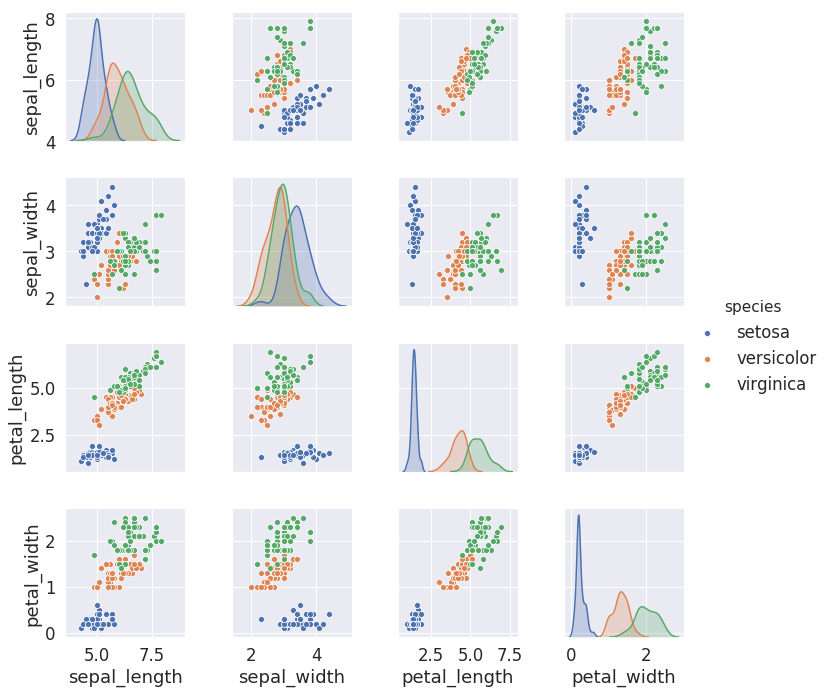

In [14]:
iris = sn.load_dataset("iris")

sn.set(rc={'figure.figsize':(180,180)}, font_scale=1.5)
#sn.jointplot(x="sepal_length", y="petal_length", data=iris);
sn.pairplot(data=iris, hue="species");

In [15]:
# iris.describe
# iris.species
# iris.values
# iris.keys
# iris.dtypes
iris.keys

<bound method NDFrame.keys of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>